In [1]:
import folium as folium
import geopandas as gpd
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import math
import utm
from shapely.geometry import shape, LineString, Polygon
import matplotlib as mpl


In [2]:
folder_data = "../data/"
arq17 = "dados17.csv"

data17 = pd.read_csv(folder_data + arq17, dtype={'ZONA_O': str, 'ZONA_D': str}, header=0,delimiter=";", low_memory=False) 
data17 = data17.dropna(subset=['CO_O_X'])

data17 = data17.drop(['ID_DOM', 'FE_DOM', 'VIA_BICI','TP_ESTBICI','F_FAM','FE_FAM','FAMILIA','NO_MORAF',
                      'CONDMORA','QT_BANHO','QT_EMPRE','QT_AUTO','QT_MICRO','QT_LAVALOU','QT_GEL1'], axis=1)

modos17 = {0:'Other',1:'Work',2:'Work',3:'Work',4:'School',5:'Shopping',6:'Health',7:'Entertainment', 8:'House',9:'Seek Employment', 10: 'Personal Issues', 11:'Food'}
data17['MOTIVO_D'] = data17['MOTIVO_D'].replace(modos17)

In [3]:
data17 = data17[data17['MOTIVO_D'] == 'Health']

In [4]:
print(data17.count)
print(data17['FE_VIA'].sum())

<bound method DataFrame.count of         ZONA  MUNI_DOM  CO_DOM_X  CO_DOM_Y  F_DOM   DOM  CD_ENTRE      DATA  \
67         1        36    333847   7394431      1    22         1   8092017   
192        1        36    332861   7394724      1   671         1  29112017   
197        1        36    332861   7394724      0   671         1  29112017   
201        1        36    332861   7394724      0   671         1  29112017   
239        1        36    333458   7394389      1   786         1   7082018   
...      ...       ...       ...       ...    ...   ...       ...       ...   
182542   516        31    312175   7402685      1  2470         1   6102018   
182667   516        31    311139   7402054      0  2860         1   6102018   
182678   516        31    311314   7403219      1  2990         1  22092018   
182684   516        31    311314   7403219      0  2990         1  22092018   
182939   517        25    297819   7408874      0   320         1  18042018   

        TIPO_DOM  

In [5]:
print(data17.describe())

              ZONA     MUNI_DOM       CO_DOM_X      CO_DOM_Y        F_DOM  \
count  3903.000000  3903.000000    3903.000000  3.903000e+03  3903.000000   
mean    245.631309    31.862926  334276.162183  7.392288e+06     0.419933   
std     148.626481     8.617709   14800.546006  9.374617e+03     0.493611   
min       1.000000     1.000000  282120.000000  7.348073e+06     0.000000   
25%     103.000000    33.000000  325209.000000  7.386961e+06     0.000000   
50%     239.000000    36.000000  331863.000000  7.393356e+06     0.000000   
75%     373.000000    36.000000  342493.000000  7.397839e+06     1.000000   
max     517.000000    39.000000  414034.000000  7.429868e+06     1.000000   

               DOM  CD_ENTRE          DATA     TIPO_DOM         AGUA  ...  \
count  3903.000000    3903.0  3.903000e+03  3903.000000  3903.000000  ...   
mean    630.489880       1.0  1.632325e+07     1.006149     0.980784  ...   
std     730.621135       0.0  8.913324e+06     0.078185     0.137301  ...  

<Figure size 2160x1440 with 0 Axes>

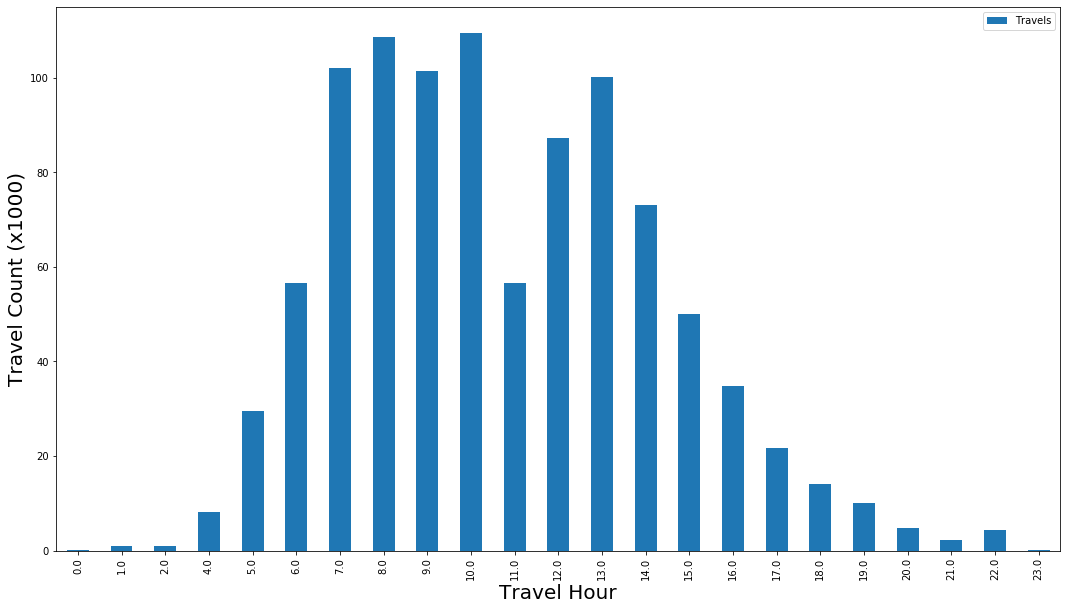

In [6]:
plt.figure(figsize=(30,20))
conj3 = data17[['H_SAIDA', 'FE_VIA']].groupby(['H_SAIDA']).sum().sort_values(by=['FE_VIA']).reset_index()
conj3.columns = ['H_SAIDA', 'FE_VIA']

conj3['FE_VIA'] = conj3['FE_VIA'] / 1000
conj3 = conj3.rename(columns={"H_SAIDA": "Hour", "FE_VIA": "Travels"})

ax = conj3.sort_values(by=['Hour']).plot.bar(x='Hour', y='Travels')
ax.figure.set_size_inches(18,10)

plt.xlabel('Travel Hour', fontsize=20)
plt.ylabel('Travel Count (x1000)', fontsize=20)

plt.show()

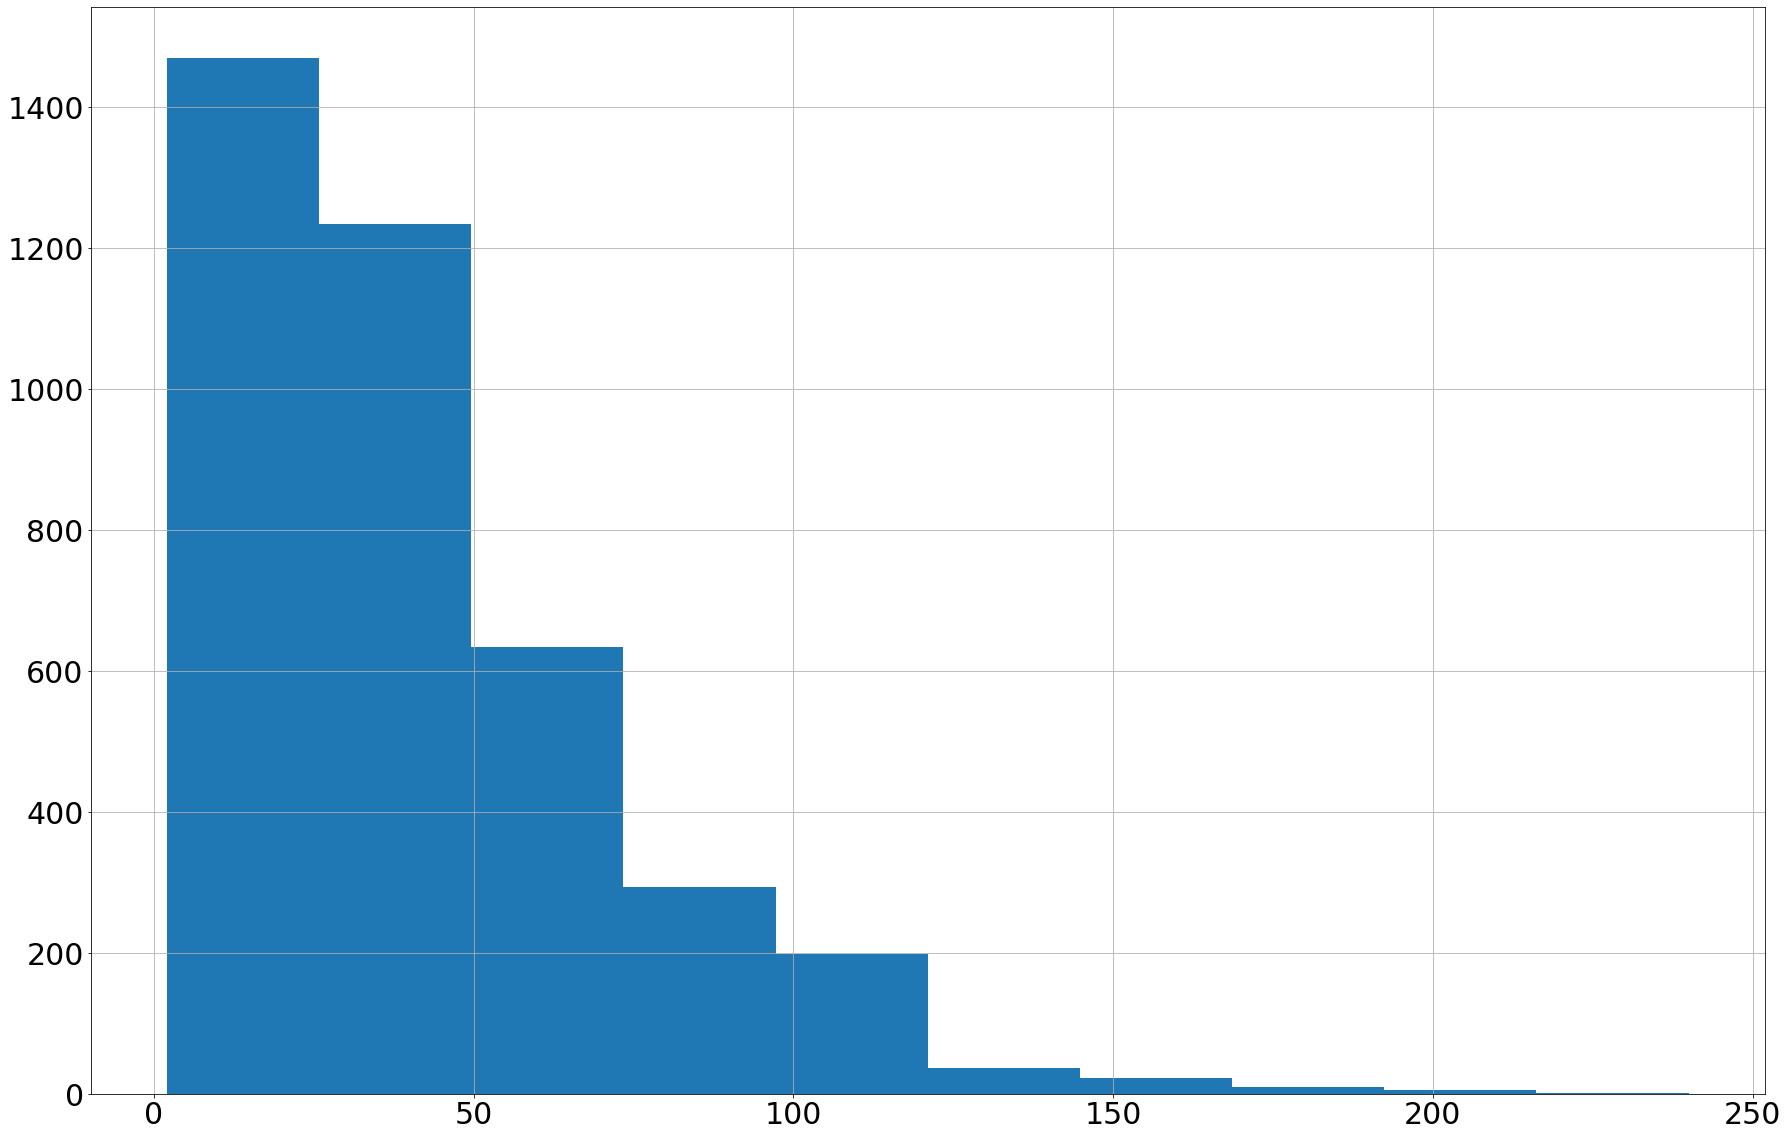

In [23]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(30,20))
data17['DURACAO'].hist()
plt.show()

In [8]:
modos17 = {0:'Other',1:'Subway',2:'Train',3:'Subway',4:'Bus',5:'Bus',6:'Bus',7:'Bus', 8:'Scholar Bus',9:'Car (Driver)', 10: 'Car (Passenger)', 11:'Taxi', 12:'Apps', 13:'Motorcycle', 14:'Motorcycle', 15:'Bike', 16:'Pedestrian', 17: 'Other'}
data17['MODOPRIN'] = data17['MODOPRIN'].replace(modos17)

<Figure size 2160x1440 with 0 Axes>

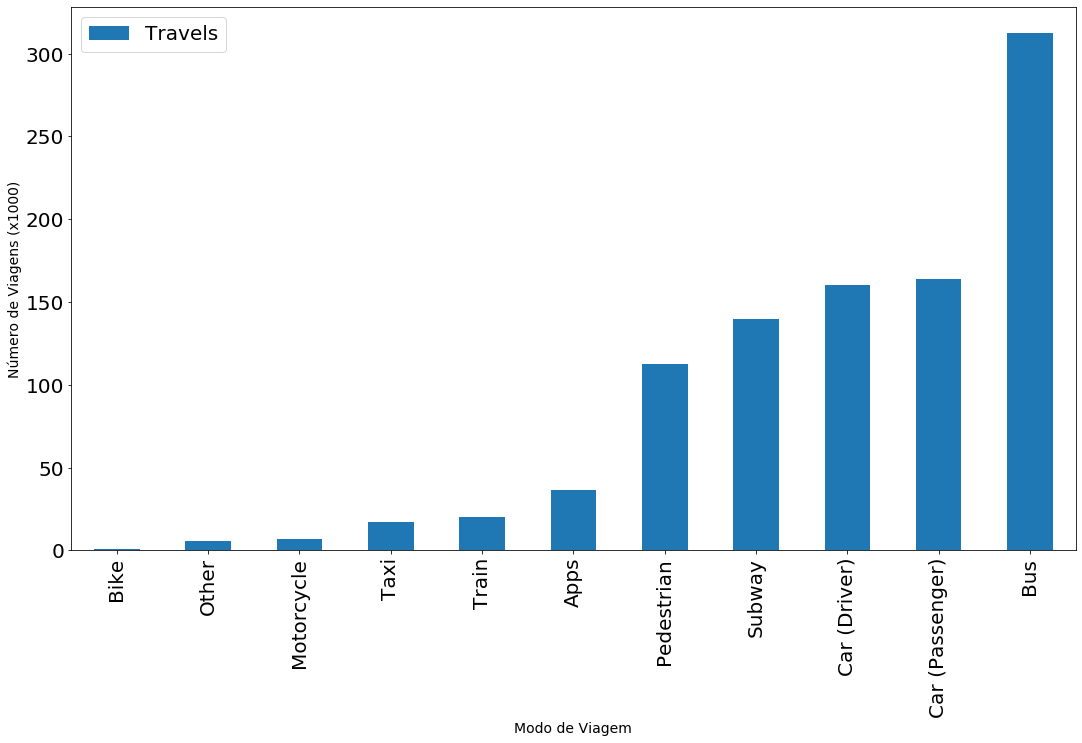

In [9]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(30,20))
conj1 = data17[['MODOPRIN', 'FE_VIA']].groupby(['MODOPRIN']).sum().sort_values(by=['FE_VIA']).reset_index()
conj1.columns = ['MODOPRIN', 'FE_VIA']

conj1['FE_VIA'] = conj1['FE_VIA'] / 1000
conj1 = conj1.rename(columns={"MODOPRIN": "Travel Mode", "FE_VIA": "Travels"})


ax = conj1.plot.bar(x='Travel Mode', y='Travels')
ax.figure.set_size_inches(18,10)

plt.xlabel('Modo de Viagem', fontsize=14)
plt.ylabel('Número de Viagens (x1000)', fontsize=14)

plt.show()

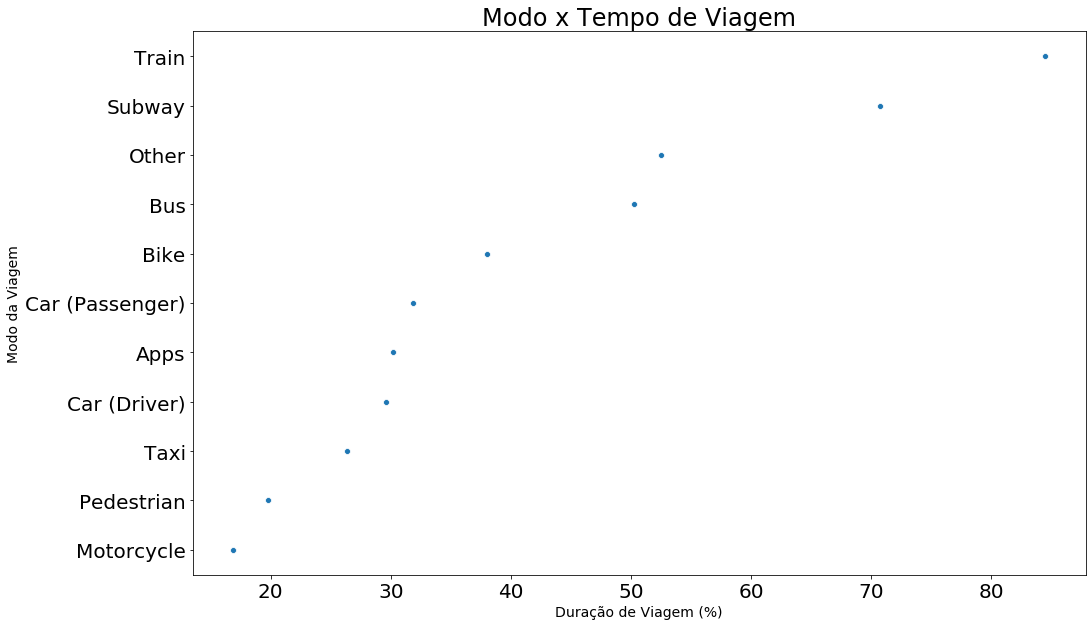

   MODOPRIN    DURACAO
6      Bike  38.000000
7       Bus  50.241811
8     Other  52.500000
9    Subway  70.725217
10    Train  84.473684
         DURACAO
DURACAO      1.0


In [10]:
distri_renda = data17[['MODOPRIN', 'DURACAO']].groupby(['MODOPRIN']).mean().sort_values(by=['DURACAO']).reset_index()
distri_renda.columns = ['MODOPRIN', 'DURACAO']


plt.figure(figsize=(16,10))

sns.scatterplot(x="DURACAO", y="MODOPRIN", data=distri_renda).set_title('Modo x Tempo de Viagem')
plt.xlabel('Duração de Viagem (%)', fontsize=14)
plt.ylabel('Modo da Viagem', fontsize=14)
plt.show()

print(distri_renda.tail())
print(distri_renda[['MODOPRIN', 'DURACAO']].corr())

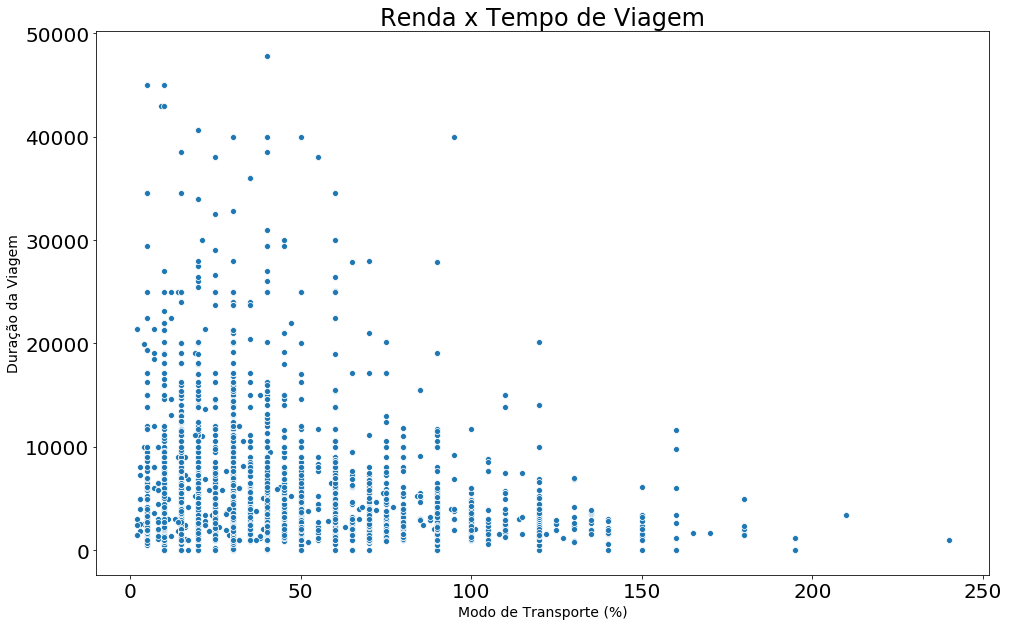

In [11]:

plt.figure(figsize=(16,10))
sns.scatterplot(x="DURACAO", y="RENDA_FA", data=data17).set_title('Renda x Tempo de Viagem')
plt.xlabel('Modo de Transporte (%)', fontsize=14)
plt.ylabel('Duração da Viagem', fontsize=14)
plt.show()


In [12]:
bins = pd.cut(data17['RENDA_FA'], [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,10000,100000])

groups = data17.groupby(bins)['RENDA_FA','DURACAO'].agg(['count', 'sum','mean'])
print(groups)


                RENDA_FA                           DURACAO                    
                   count         sum          mean   count      sum       mean
RENDA_FA                                                                      
(0, 1000]            242   210515.46    869.898595     242  10805.0  44.648760
(1000, 2000]         594   984541.56   1657.477374     594  27528.0  46.343434
(2000, 3000]         715  1807136.22   2527.463245     715  33226.0  46.469930
(3000, 4000]         598  2107759.10   3524.680769     598  25778.0  43.107023
(4000, 5000]         431  1985519.37   4606.773480     431  16924.0  39.266821
(5000, 6000]         250  1393933.45   5575.733800     250   9662.0  38.648000
(6000, 7000]         226  1472379.71   6514.954469     226   7748.0  34.283186
(7000, 8000]         124   941072.32   7589.292903     124   4280.0  34.516129
(8000, 9000]         138  1172617.54   8497.228551     138   4676.0  33.884058
(9000, 10000]        113  1103833.37   9768.436903  

In [13]:
def calculate_weighted_mean(data):
    data['FE_VIA'] = data['FE_VIA'].apply(lambda x: 1 if math.isnan(x) else x)
    data['FE_VIA'] = data['FE_VIA'].apply(lambda x: 1 if int(x) == 0 else x)
    data['MP'] = data['FE_VIA'] * data['DURACAO']
    data['MP_DIST'] = data['FE_VIA'] * data['DISTANCE']
    return data

mapa = gpd.GeoDataFrame.from_file("../data/shapes/Distritos_2017_region.shp", encoding='latin-1')
mapa = mapa.to_crs({"init": "epsg:4326"})
mapa['NomeDistri'] = mapa['NomeDistri'].apply(lambda x: unidecode.unidecode(x))

zonas = gpd.GeoDataFrame.from_file("../data/shapes/Zonas_2017_region.shp", encoding='latin-1')
zonas = zonas.to_crs({"init": "epsg:4326"}) 
zonas['NomeDistri'] = zonas['NomeDistri'].apply(lambda x: unidecode.unidecode(x))
zonas['NomeZona'] = zonas['NomeZona'].apply(lambda x: unidecode.unidecode(x))

zonas_teste = zonas[zonas['NumeroMuni'] == 36]

data17['DISTANCE'] = 0

csv_file = folder_data + "regioes17.csv"
mydict = []
with open(csv_file, mode='r') as infile:
    reader = csv.reader(infile, delimiter=";")
    mydict = {rows[0]:rows[1] for rows in reader}

csv_file = folder_data + "zonas17.csv"
zonas_nomes = []
with open(csv_file, mode='r') as infile:
    reader = csv.reader(infile, delimiter=";")
    zonas_nomes = {rows[0]:rows[1] for rows in reader}

data17['NOME_O'] = data17['ZONA_O'].apply(lambda x: '' if pd.isnull(x) else mydict[x])
data17['NOME_D'] = data17['ZONA_D'].apply(lambda x: '' if pd.isnull(x) else mydict[x])

data17['ZONA_O'] = data17['ZONA_O'].apply(lambda x: '' if pd.isnull(x) else zonas_nomes[x])
data17['ZONA_D'] = data17['ZONA_D'].apply(lambda x: '' if pd.isnull(x) else zonas_nomes[x])


data17['NUM_TRANS'] = data17[['MODO1', 'MODO2','MODO3','MODO4']].count(axis=1)

data17 = calculate_weighted_mean(data17)

          NomeDistri                                           geometry  \
0          Agua Rasa  POLYGON Z ((-5182374.432 -2700915.490 0.000, -...   
1  Alto de Pinheiros  POLYGON Z ((-5197768.754 -2698229.373 0.000, -...   
2         Anhanguera  POLYGON Z ((-5205419.673 -2683787.899 0.000, -...   
3         Aricanduva  POLYGON Z ((-5176555.632 -2702249.751 0.000, -...   
4        Artur Alvim  POLYGON Z ((-5173379.618 -2697499.062 0.000, -...   

     DURACAO  MUNI_O       FE_VIA             MP      RENDA_FA  NUM_TRANS  \
0  34.000000    36.0  1277.703906   36803.852060   9049.140000   1.000000   
1  40.500000    36.0   993.268755   24337.004355  10519.745000   1.100000   
2  47.500000    36.0   232.486524   13301.760620   2350.000000   1.000000   
3  50.555556    36.0  2846.559009  135870.384970   3933.288889   1.222222   
4  42.142857    36.0  4070.823535  178198.411070   2762.590000   1.285714   

   MP_DIST      MEDIA  MEDIA_DIST       area      indice  
0      0.0  28.804680      

/home/eduardo/.local/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


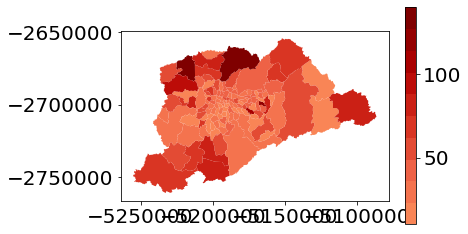

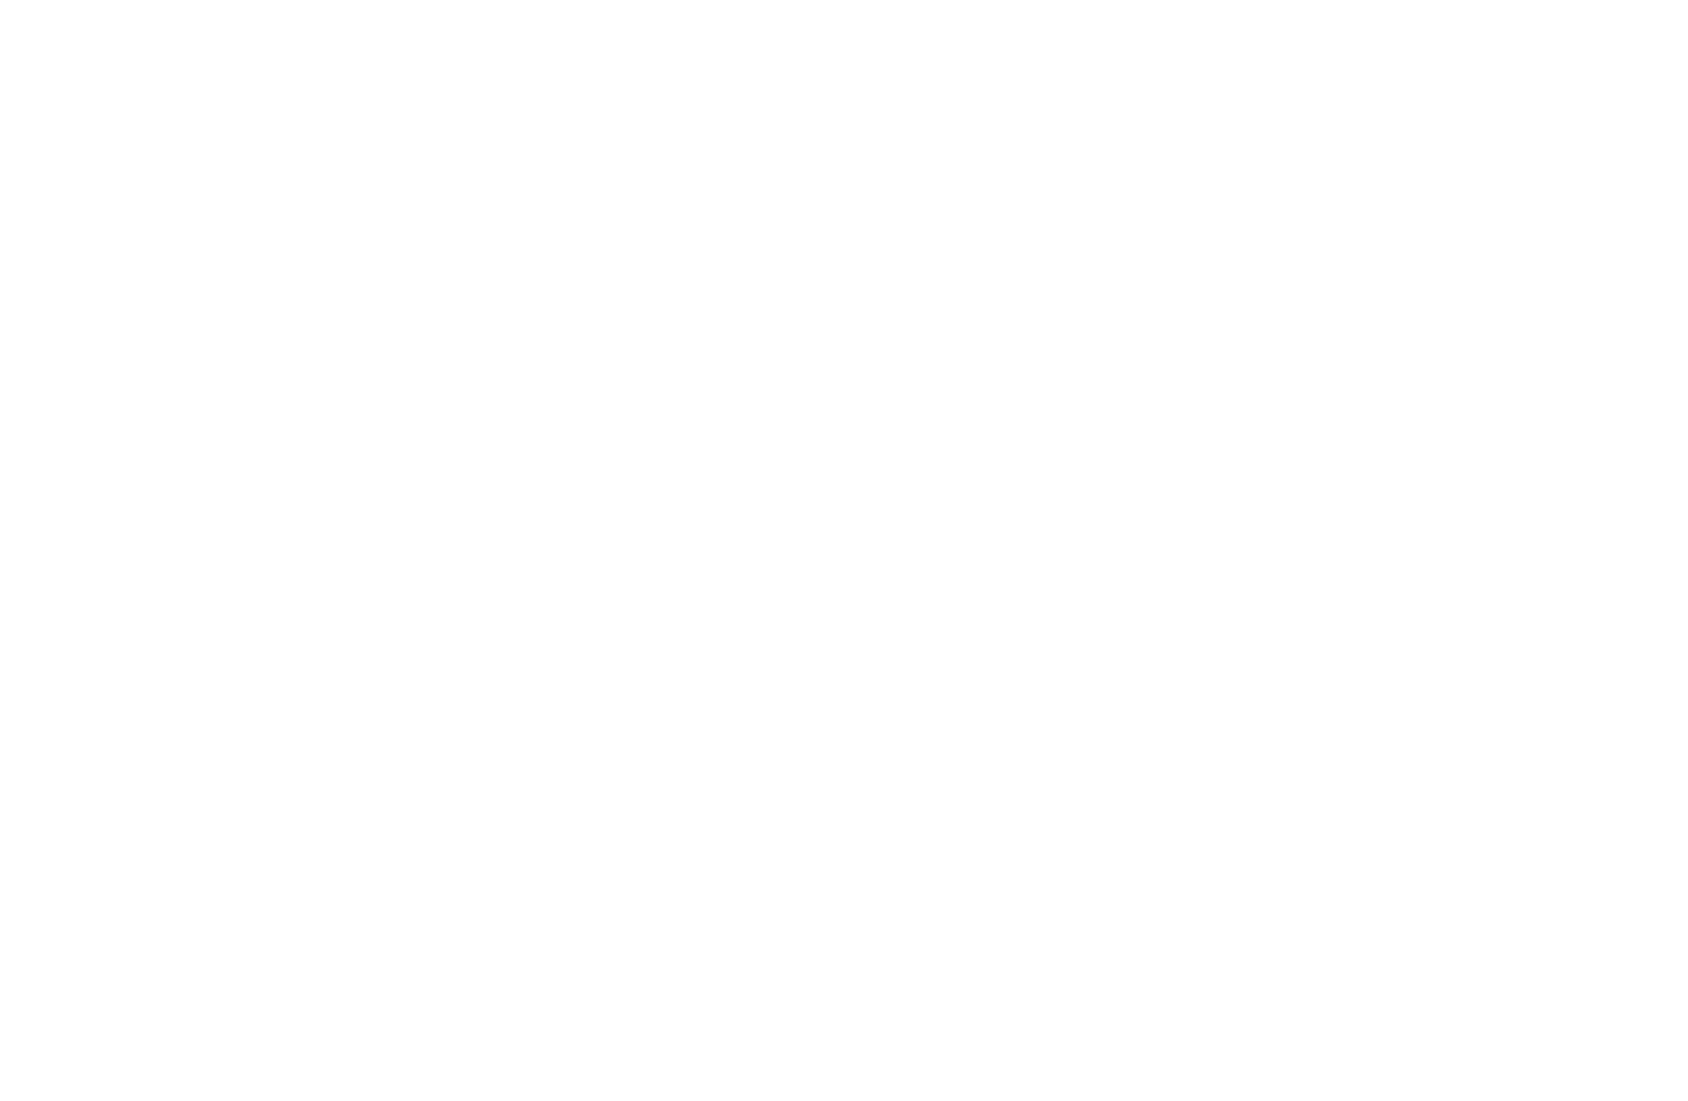

In [21]:
def load_districts(vehicle, orde):

    data17_copy = data17

    if vehicle != "0":
        vehicles = vehicle.split(",")
        vehicles_int = []
        for v in vehicles:
            vehicles_int.append(int(v))
        data17_copy = data17_copy[data17_copy['MODOPRIN'].isin(vehicles_int)] 
    
    data_mp2 = data17_copy[[orde,  'MP']].groupby([orde]).sum().sort_values(by=['MP']).reset_index()
    data_mp2 = data_mp2.set_index(orde)

    data_mp_dist = data17_copy[[orde,  'MP_DIST']].groupby([orde]).sum().sort_values(by=['MP_DIST']).reset_index()
    data_mp_dist = data_mp_dist.set_index(orde)

    data_mp = data17_copy[[orde, 'MUNI_O', 'FE_VIA']].groupby([orde,'MUNI_O']).sum().sort_values(by=[orde]).reset_index()
    data_mp = data_mp.set_index(orde)

    data_renda = data17_copy[[orde, 'RENDA_FA']].groupby([orde]).mean().sort_values(by=['RENDA_FA']).reset_index()
    data_renda = data_renda.set_index(orde)

    data_trans = data17_copy[[orde, 'NUM_TRANS']].groupby([orde]).mean().sort_values(by=['NUM_TRANS']).reset_index()
    data_trans = data_trans.set_index(orde)
        
    data_dur = data17_copy[[orde, 'DURACAO']].groupby([orde]).mean().sort_values(by=['DURACAO']).reset_index()
    data_dur = data_dur.set_index(orde)

    df = mapa.set_index('NomeDistri').join(data_dur).join(data_mp).join(data_mp2).join(data_renda).join(data_trans).join(data_mp_dist)
    df['MEDIA'] = df['MP'] / df['FE_VIA']
    df['MEDIA_DIST'] = df['MP_DIST'] / df['FE_VIA']
    df = df.reset_index()

    df = df.drop(['NumeroDist', 'Area_ha'], axis=1)

    return df


teste = load_districts("0", "ZONA_O")
teste2 = teste.to_crs({'init': 'epsg:3857'})

teste2['area'] = teste2['geometry'].area / 10**6
teste2['indice'] = teste['FE_VIA'] / teste2['area']

print(teste2.head())

cmap = mpl.cm.OrRd(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

fig, ax = plt.subplots(1, 1)
teste2.plot(column='DURACAO', ax=ax, legend=True, cmap=cmap)

folder_images_maps = "../images/"
plt.figure(figsize=(30,20))
plt.axis('off')
plt.savefig(folder_images_maps + 'quantidade_bike.png', bbox_inches='tight', pad_inches=0.0)
